## Libraries

In [1]:
import math
import sys
import os
from pathlib import Path
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
path = Path(os.path.abspath(''))
util_path = str(path.parent.absolute())

if util_path not in sys.path:
    sys.path.append(util_path)
    
from utils import helpers

In [3]:
pd.set_option('display.max_columns',None)
plt.style.use("fivethirtyeight")
np.seterr(divide = 'ignore')
warnings.filterwarnings('ignore')

## Import Data

In [131]:
def get_marketing_data():
    data = pd.read_csv("../data/raw/bank-full.csv", sep=';')
    return data

## Understand Data Shape

In [132]:
df = get_marketing_data()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
print('df shape: {}'.format(df.shape))

df shape: (45211, 17)


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: age - Unique Values: [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
Column: job - Unique Values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Column: marital - Unique Values: ['married' 'single' 'divorced']
Column: education - Unique Values: ['tertiary' 'secondary' 'unknown' 'primary']
Column: default - Unique Values: ['no' 'yes']
Column: balance - Unique Values: [ 2143    29     2 ...  8205 14204 16353]
Column: housing - Unique Values: ['yes' 'no']
Column: loan - Unique Values: ['no' 'yes']
Column: contact - Unique Values: ['unknown' 'cellular' 'telephone']
Column: day - Unique Values: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Column: 

In [10]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

## EDA

In [ ]:
from scipy import stats
# auto eval which outlier method better based on Shapiro Wilks?

stats.shapiro(np.log(df['balance']))

1. Visualize all the cols (x)
2. Check target distribution (x)
3. Check for missing values (x)
4. Check for outliers (x)

In [133]:
# ensure column names standardized
df.columns = [k.lower().replace(" ", "_") for k in df.columns]

# Pre-processing with method chaining
df['new_contact'] = np.where(df['pdays']==-1, 1, 0)
df['pdays'] = np.where(df['pdays']==-1, 0, df['pdays'])
recode_education_var = {"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3}
df["education"] = df["education"].replace(recode_education_var)

# label encoding (ordinal variables)
label_encoding_columns = ['education']

# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = [
    "job",
    "marital",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "day",
    "poutcome",
    "new_contact"
]

cat_cols = label_encoding_columns + one_hot_encoding_columns
df[cat_cols] = df[cat_cols].astype("category")

# numeric variables
num_columns = ['age', 'balance', 'campaign', 'pdays', 'previous']

# cols to drop
drop_cols = ['duration']

# target col
TARGET_NAME = 'y'
RAW_FALSE = 'no'
X = df.drop([TARGET_NAME], axis=1)
y = np.where(df[TARGET_NAME] == RAW_FALSE, 0, 1)

# split data - ADD STEP TO DEAL WITH IMBALANCED DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [134]:
from importlib import reload  # Python 3.4+
reload(helpers)

<module 'utils.helpers' from '/home/david.zhao/value-ml/utils/helpers.py'>

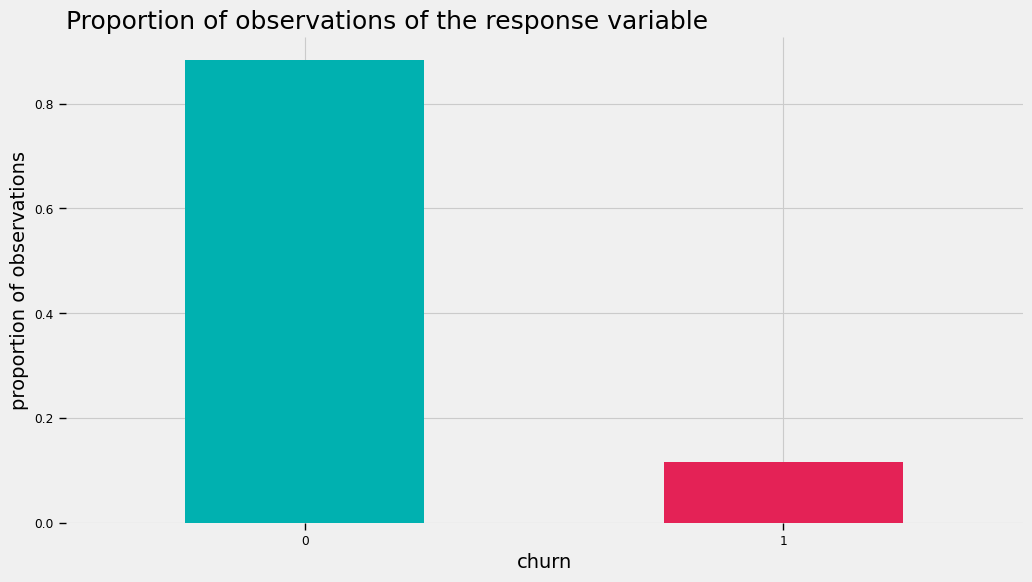

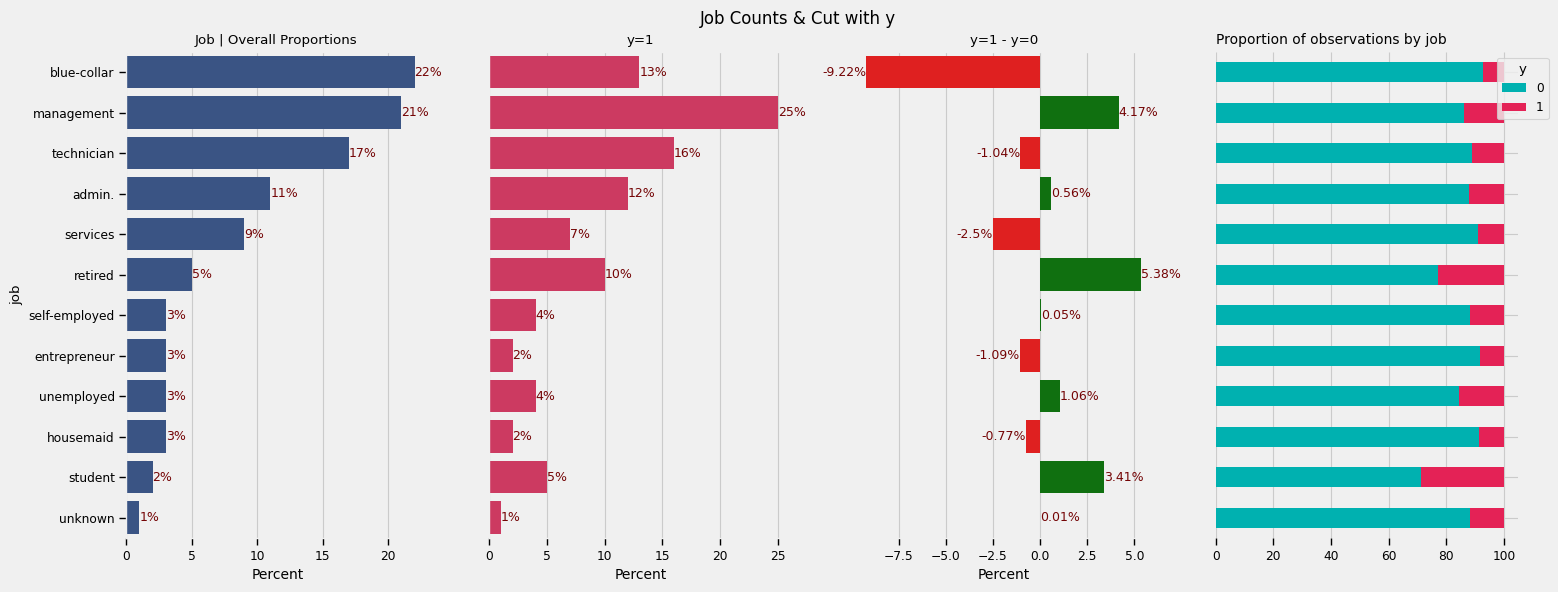

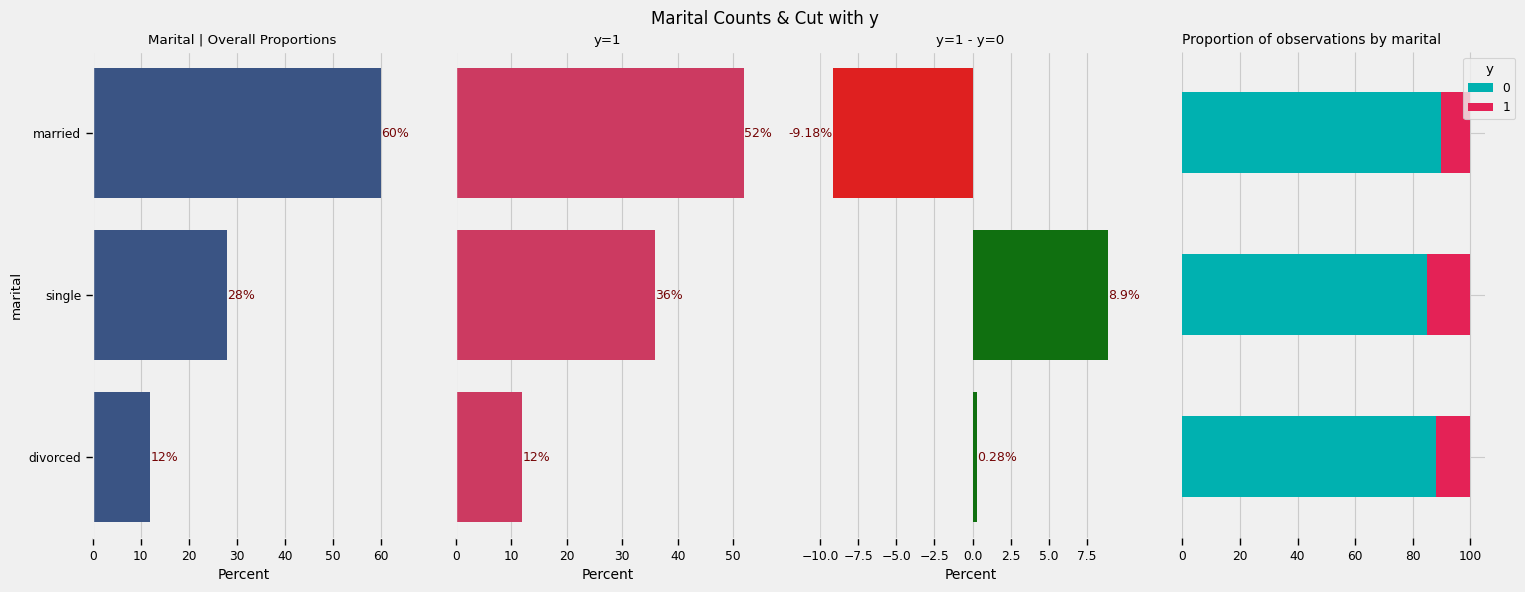

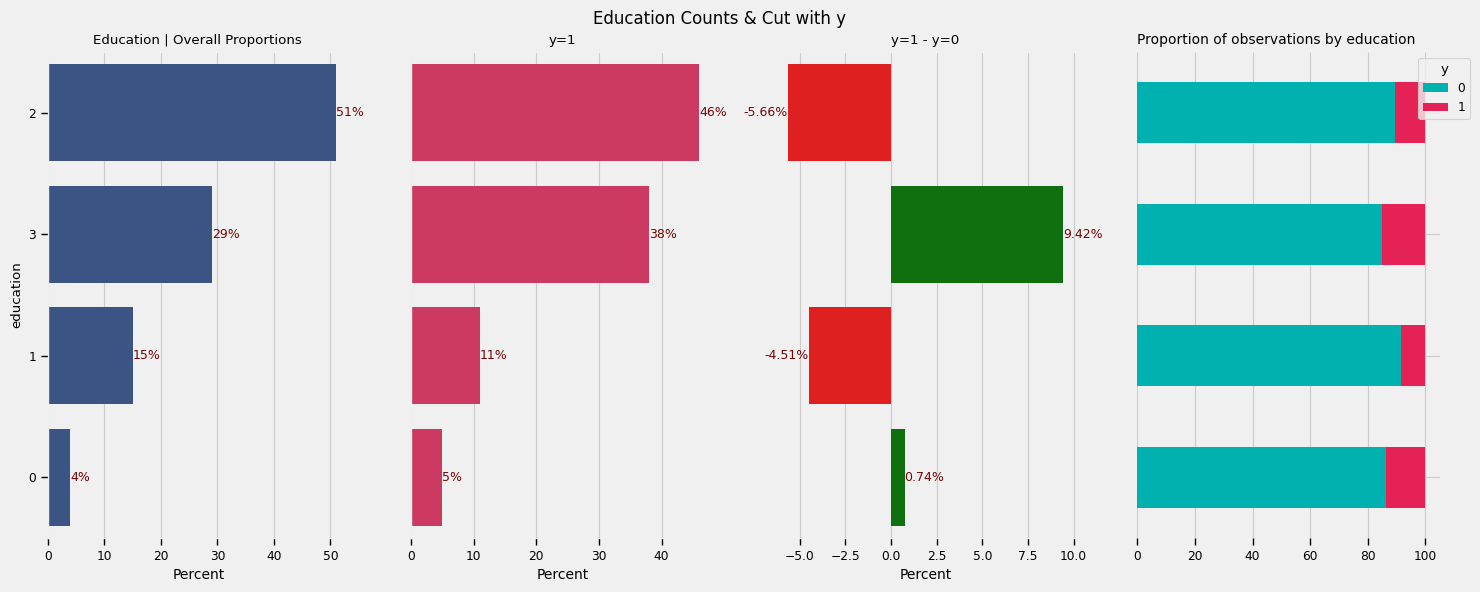

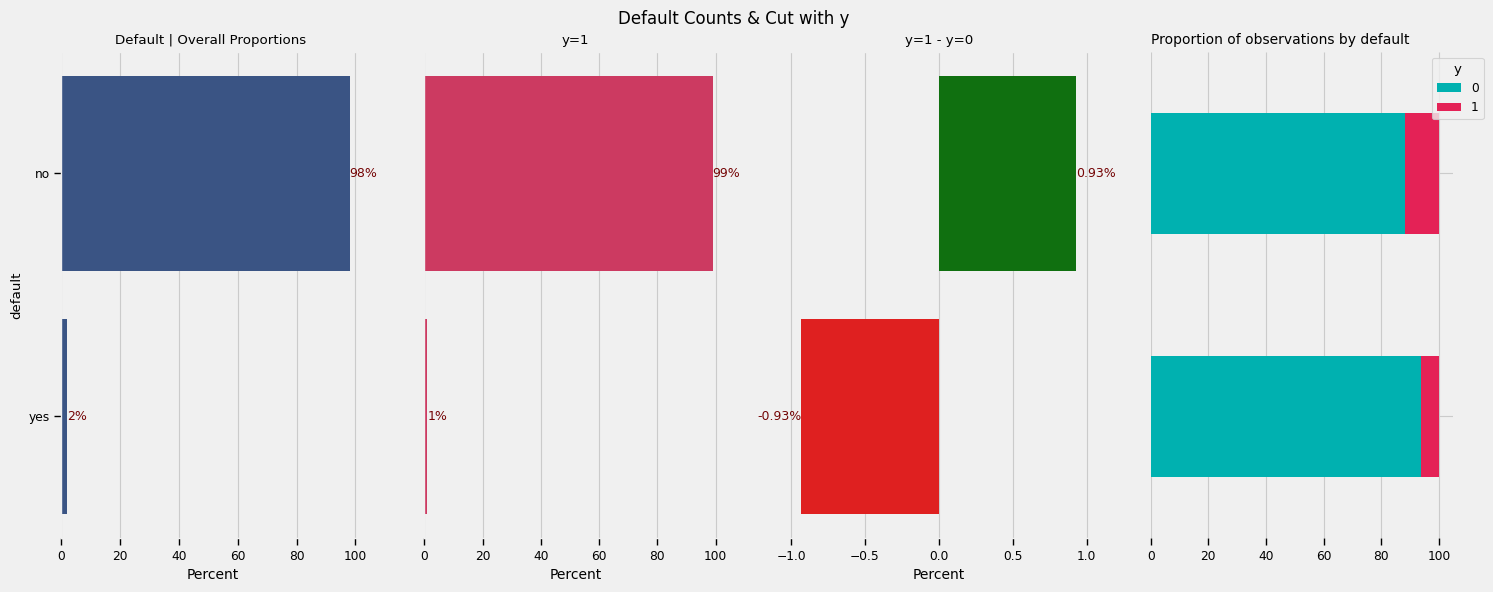

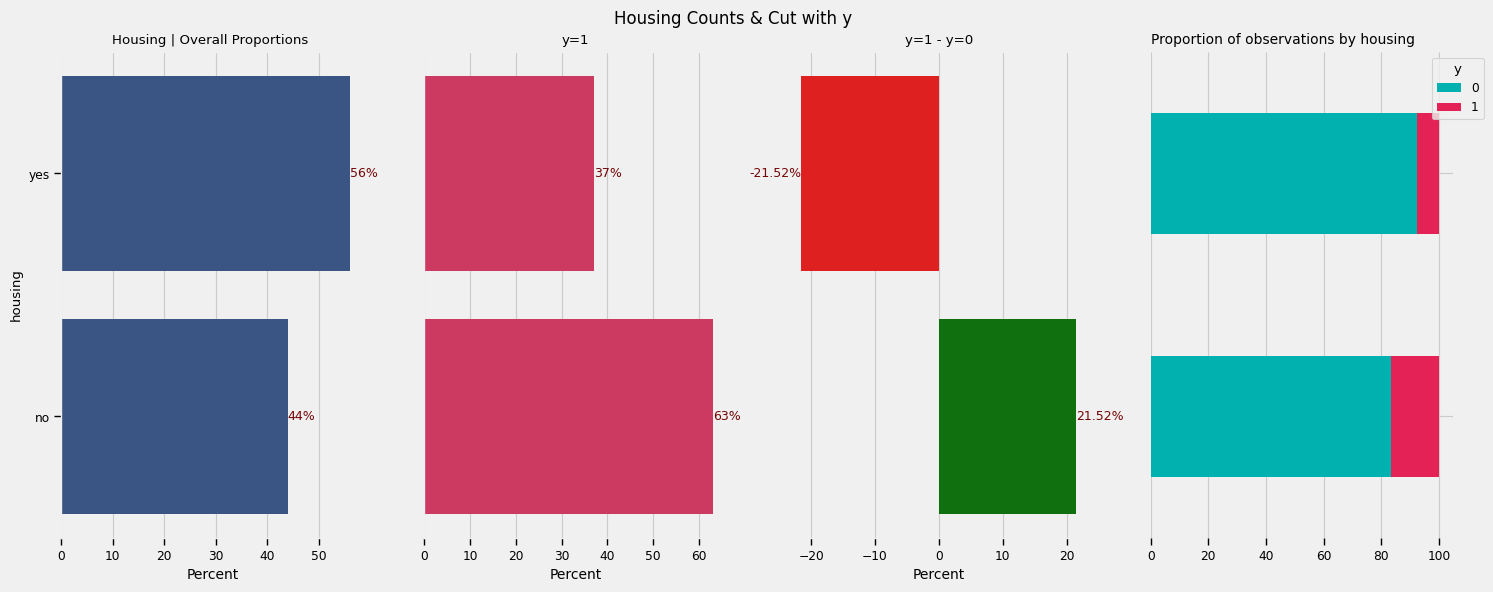

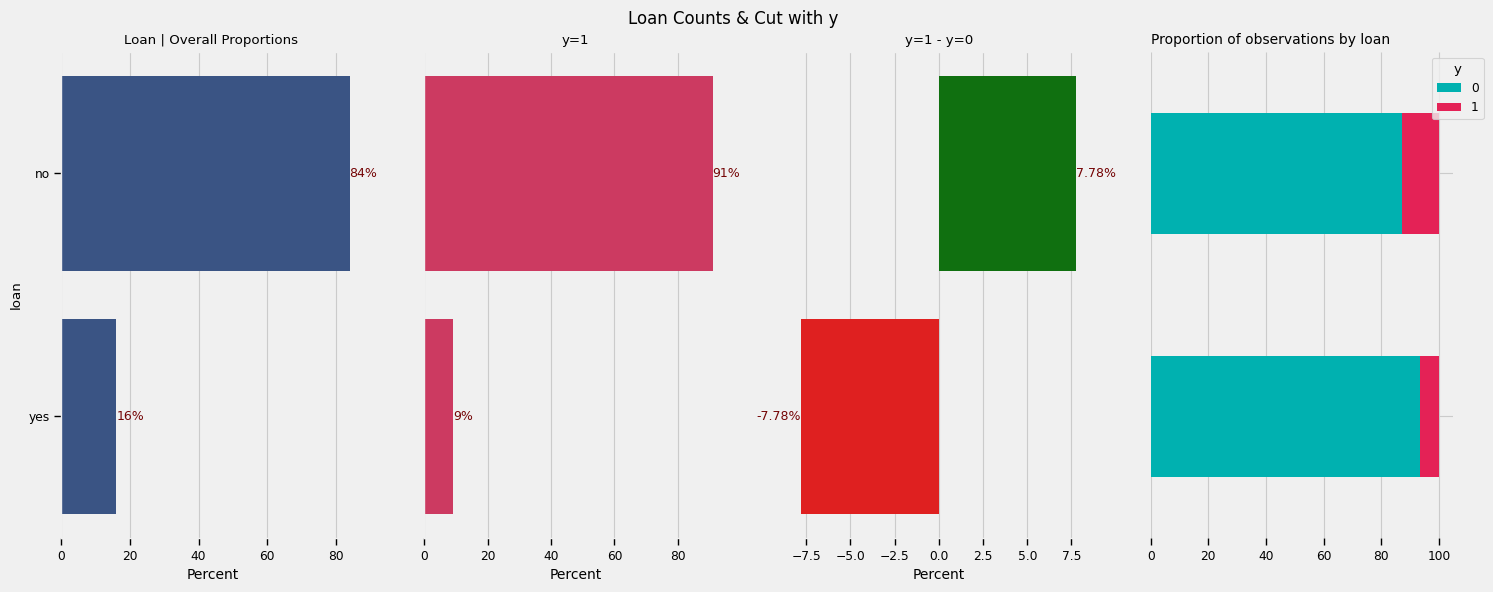

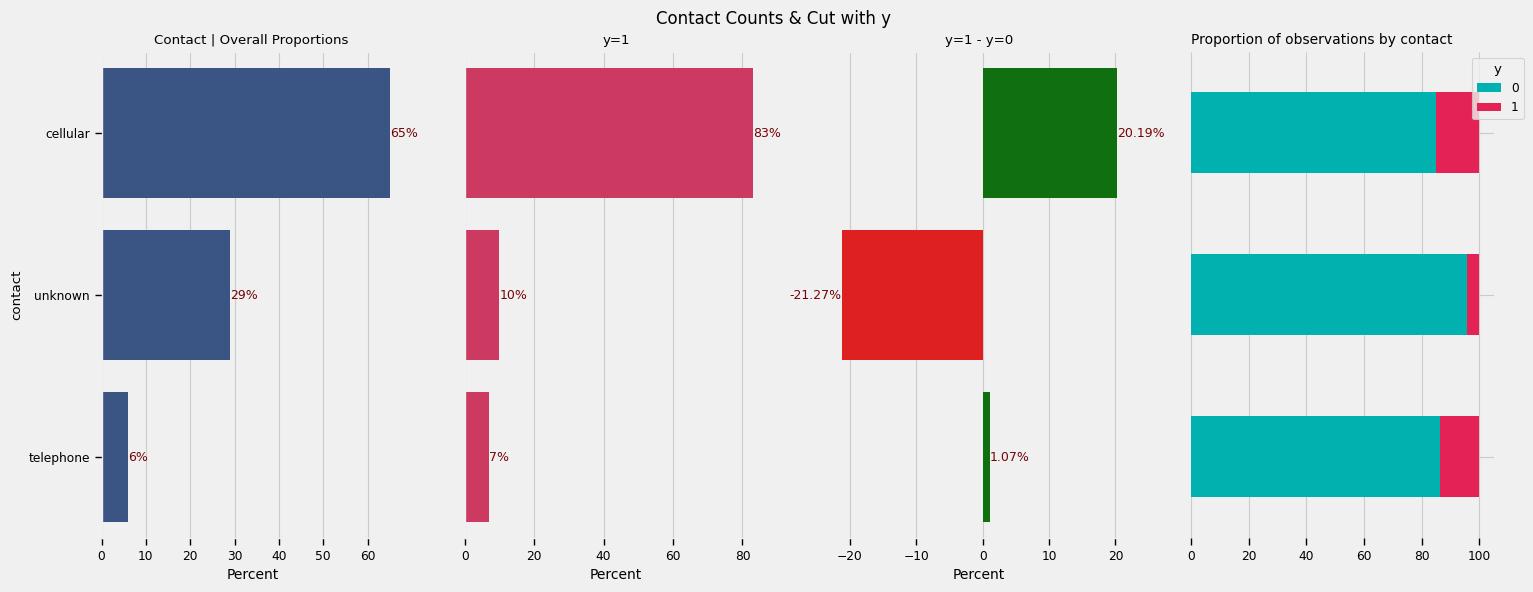

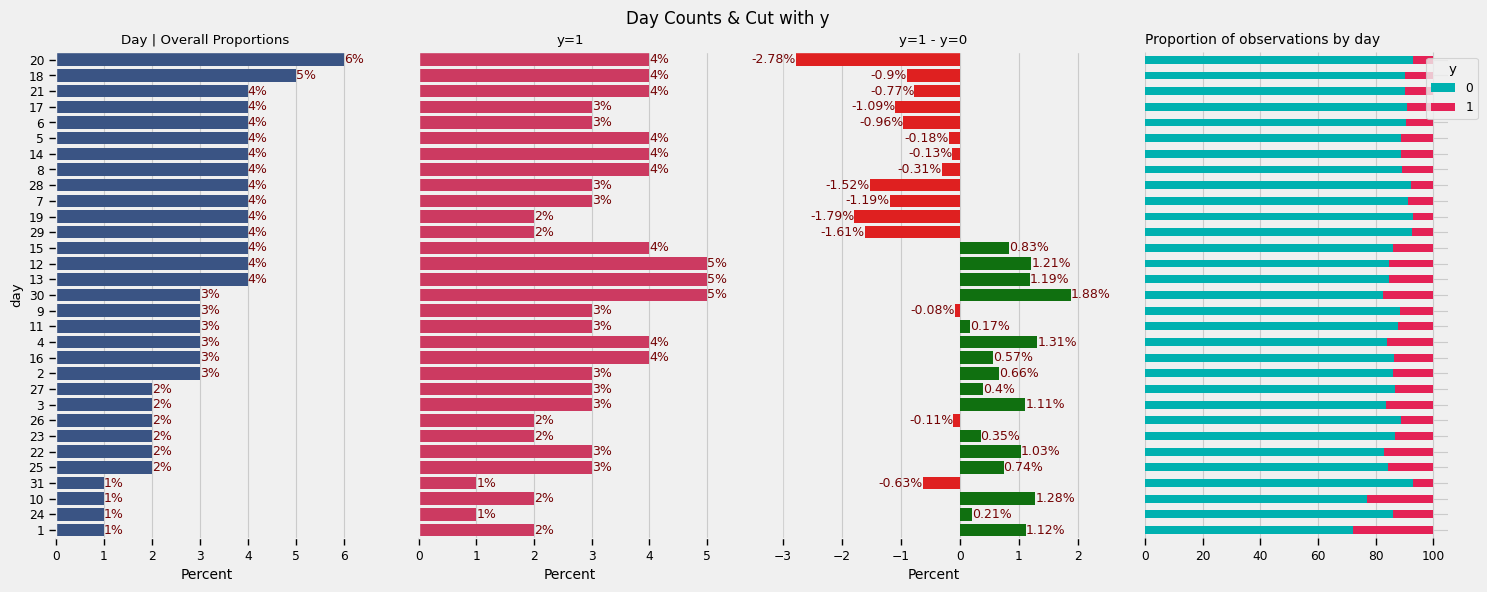

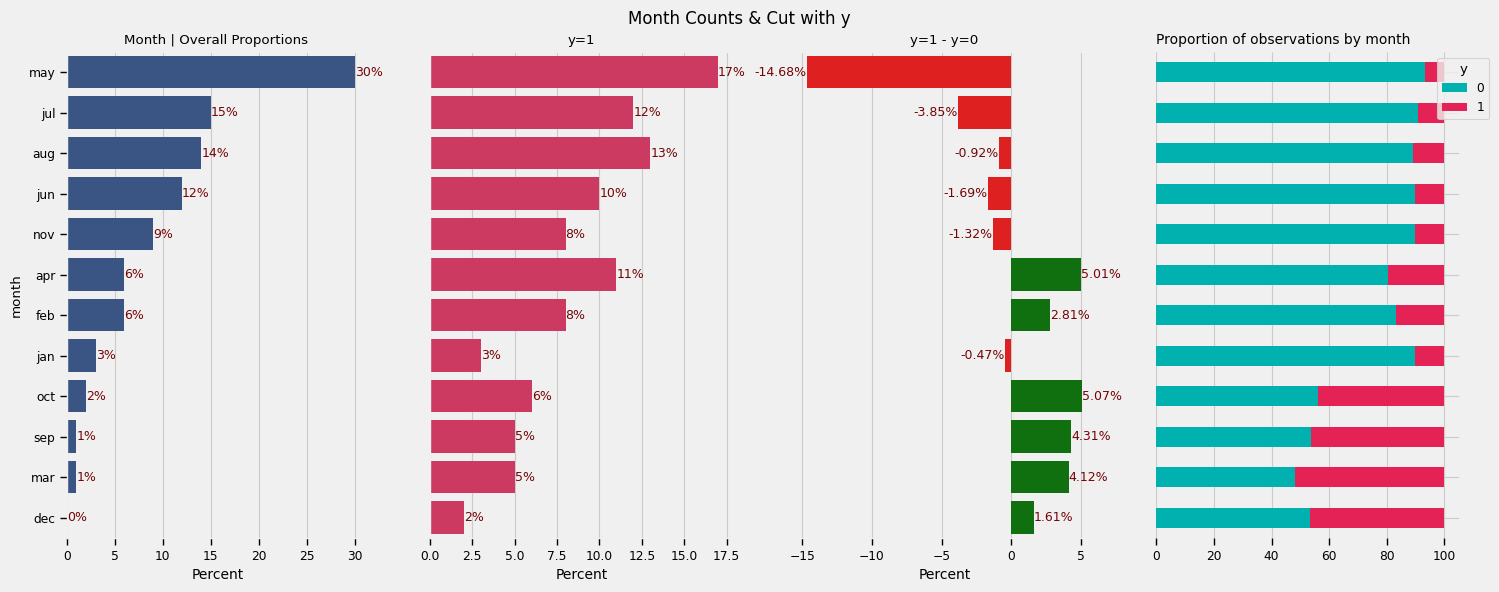

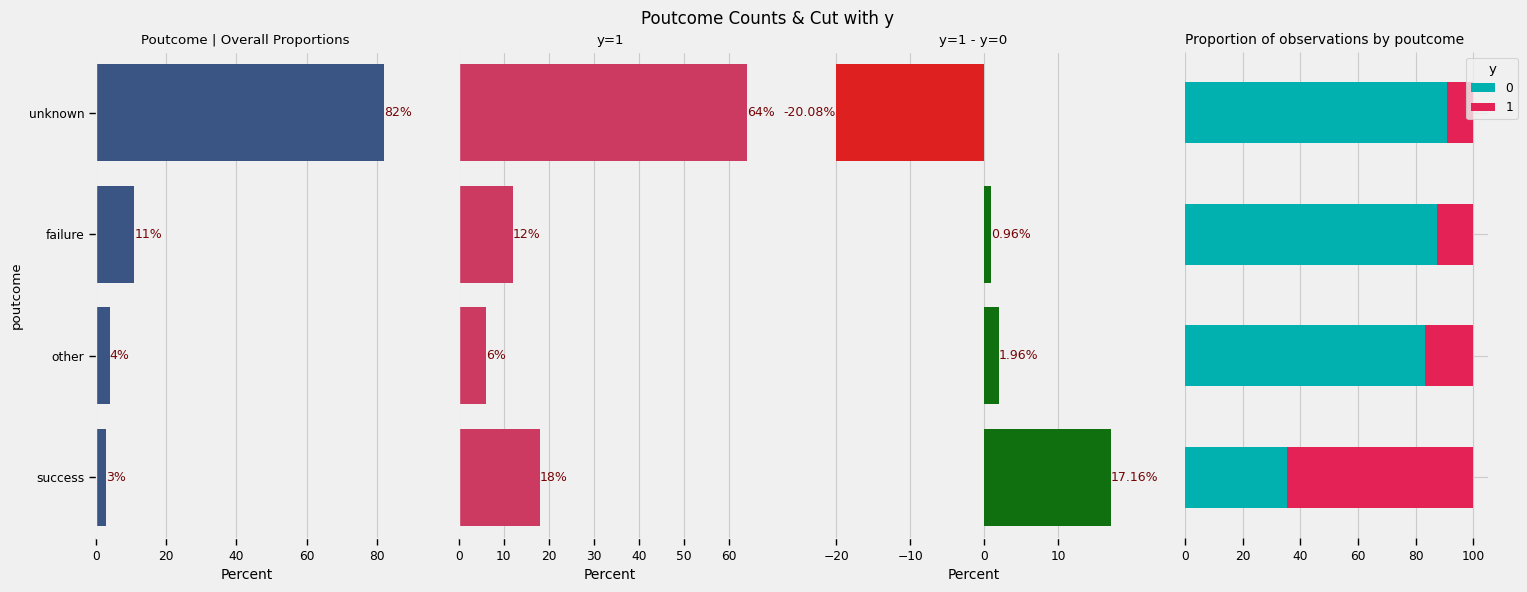

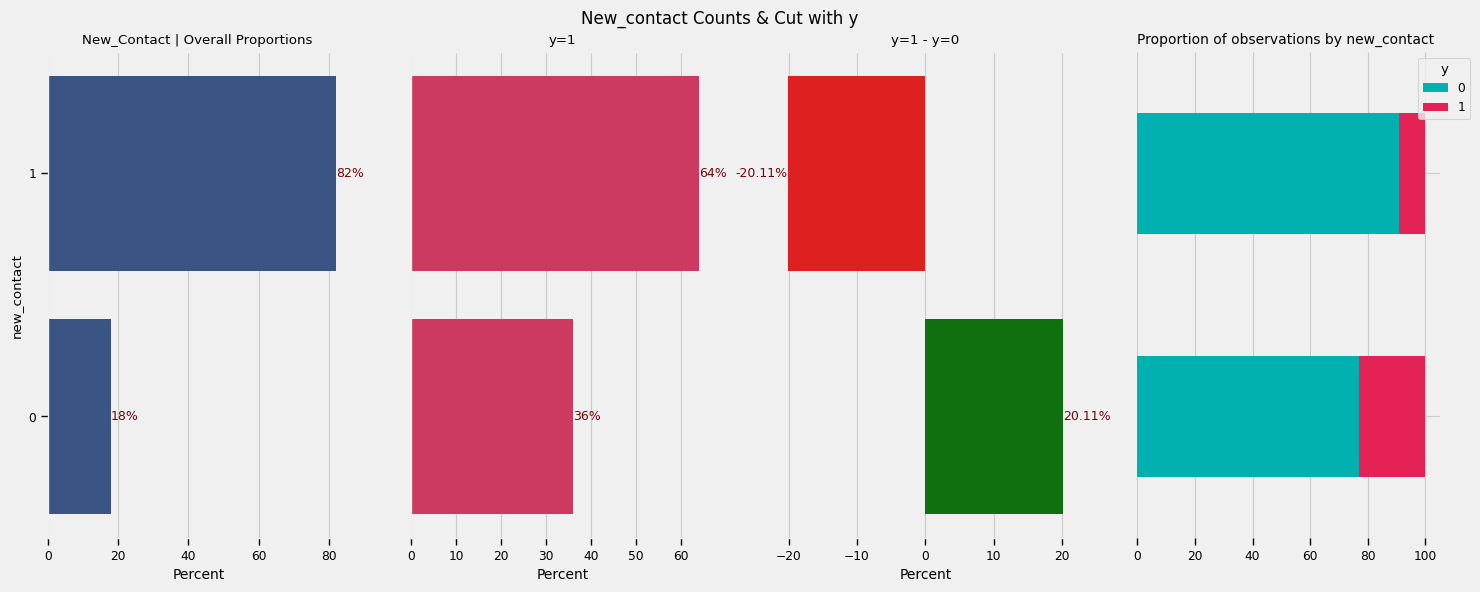

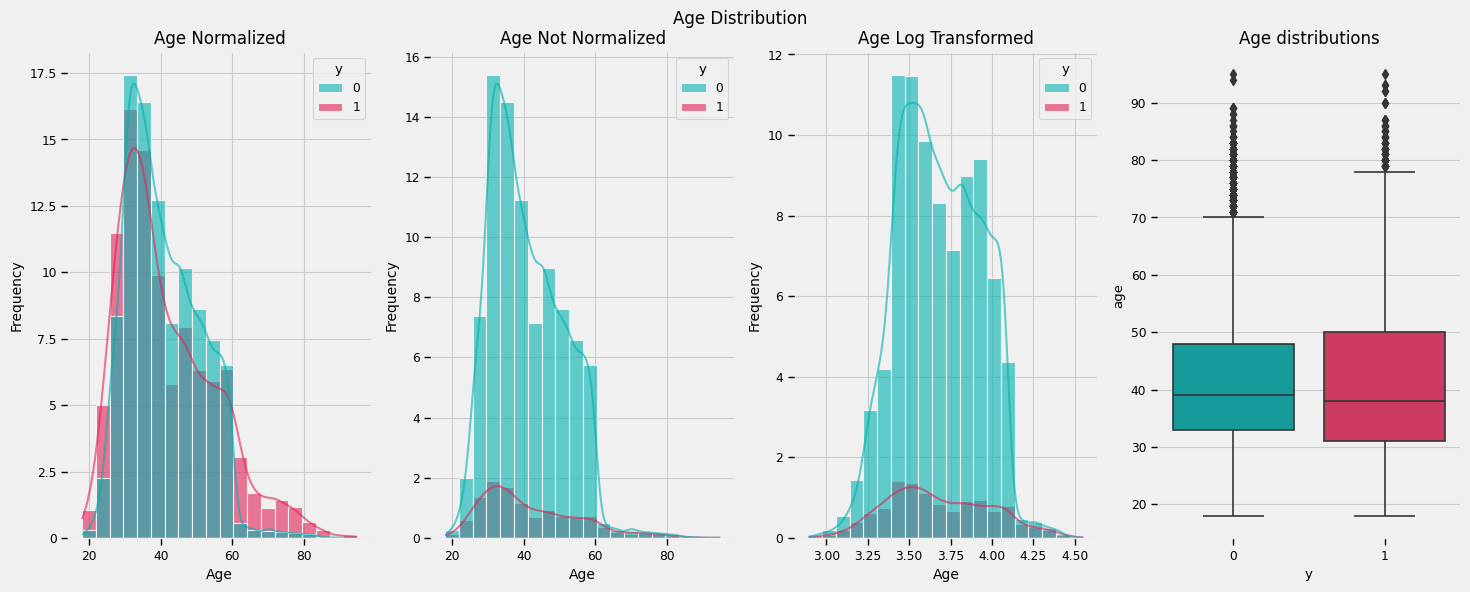

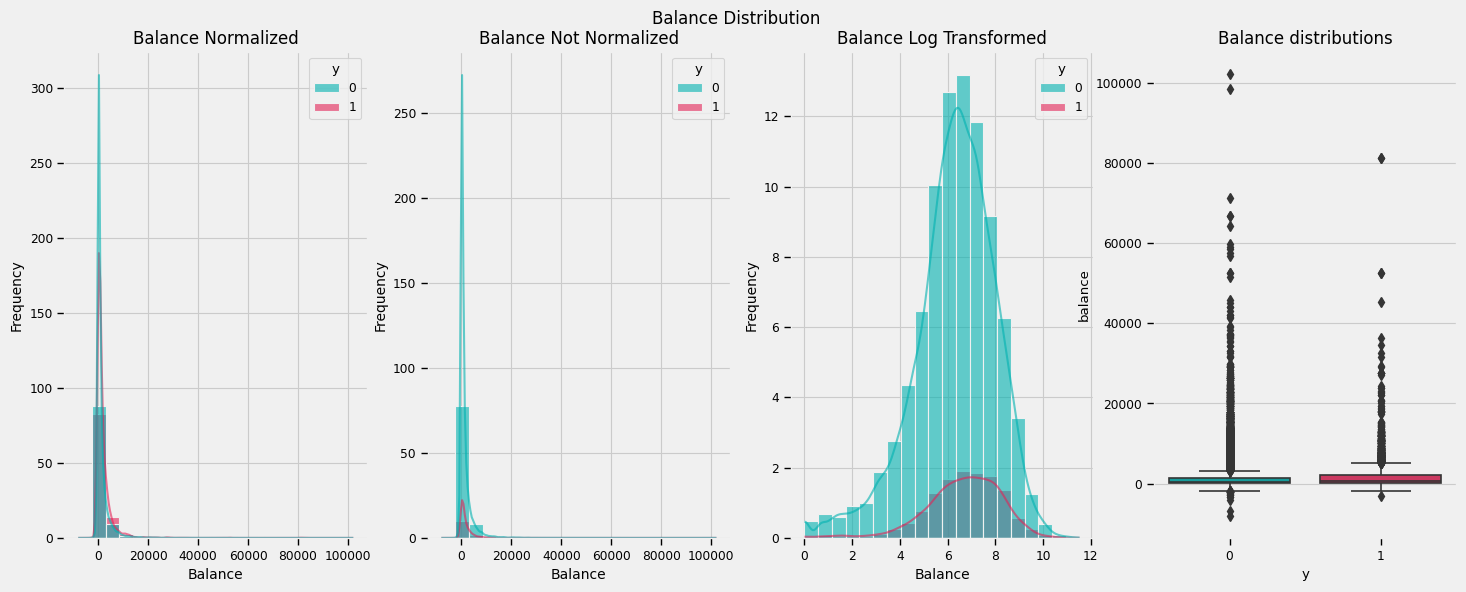

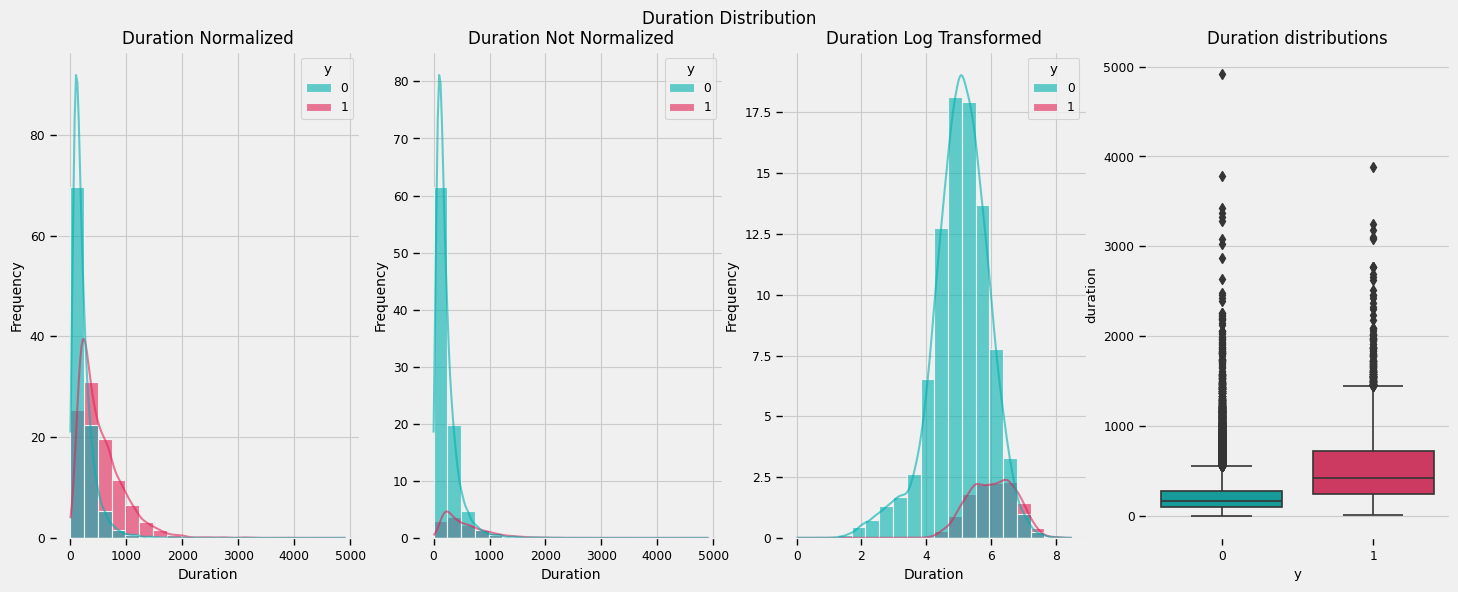

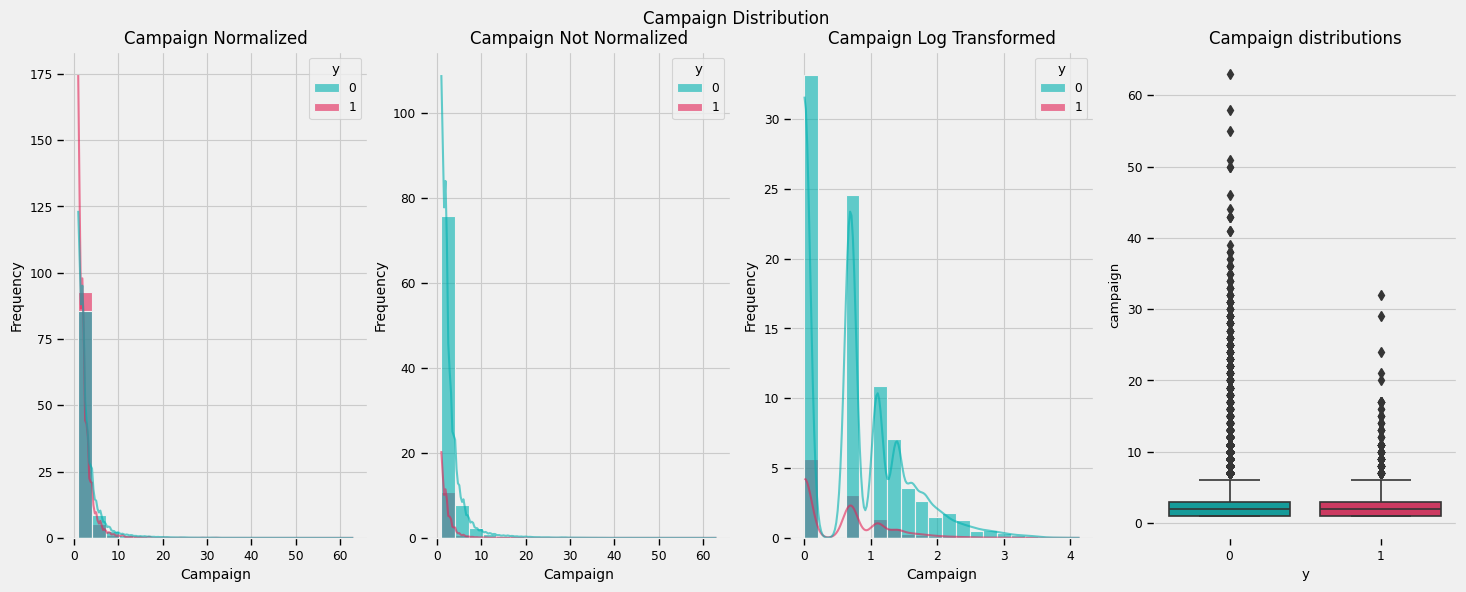

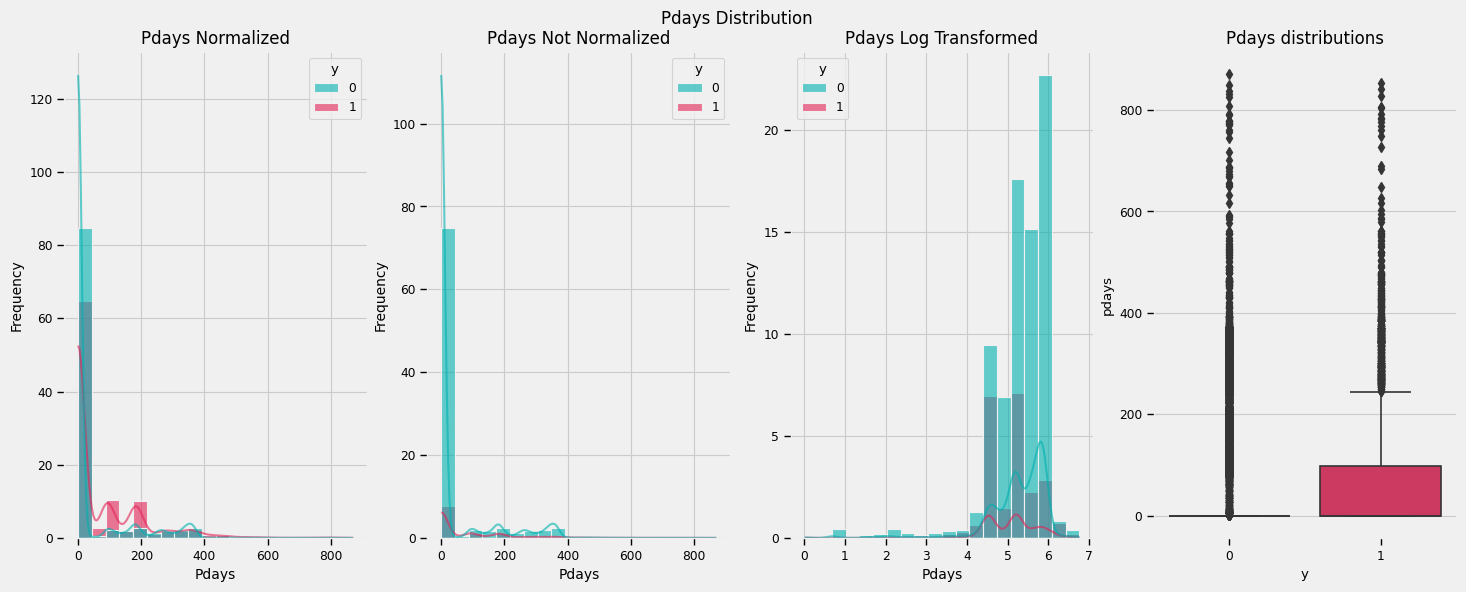

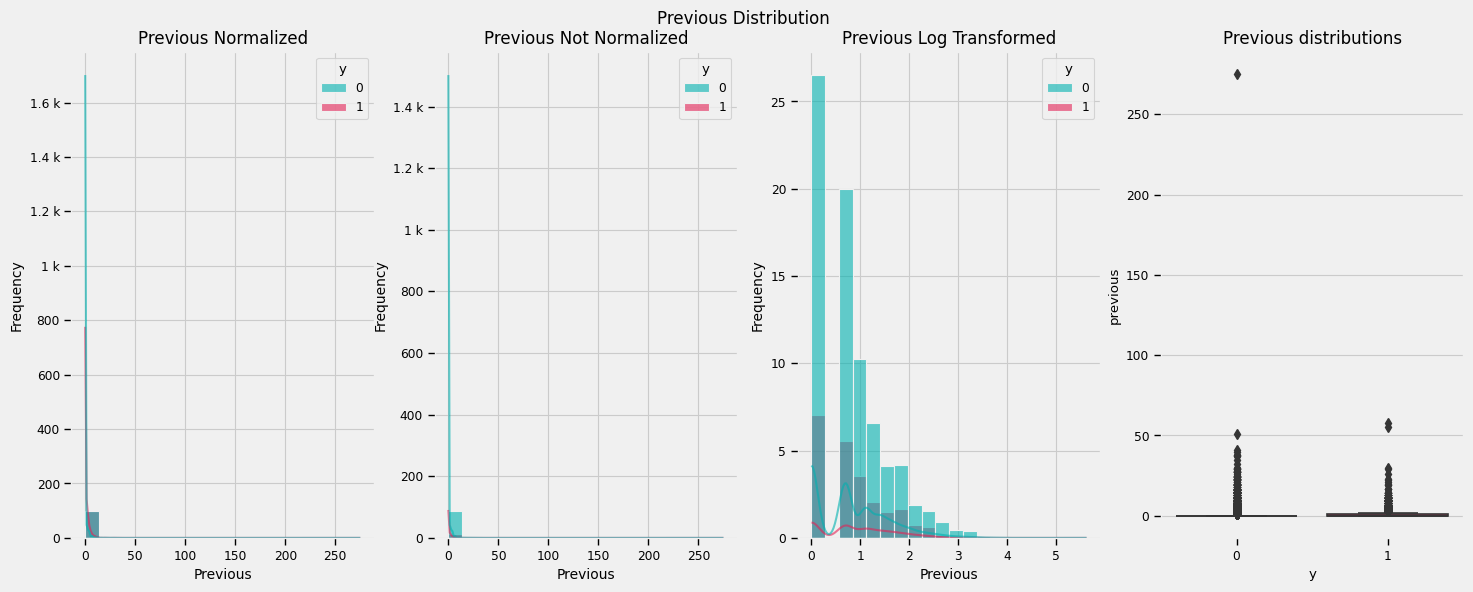

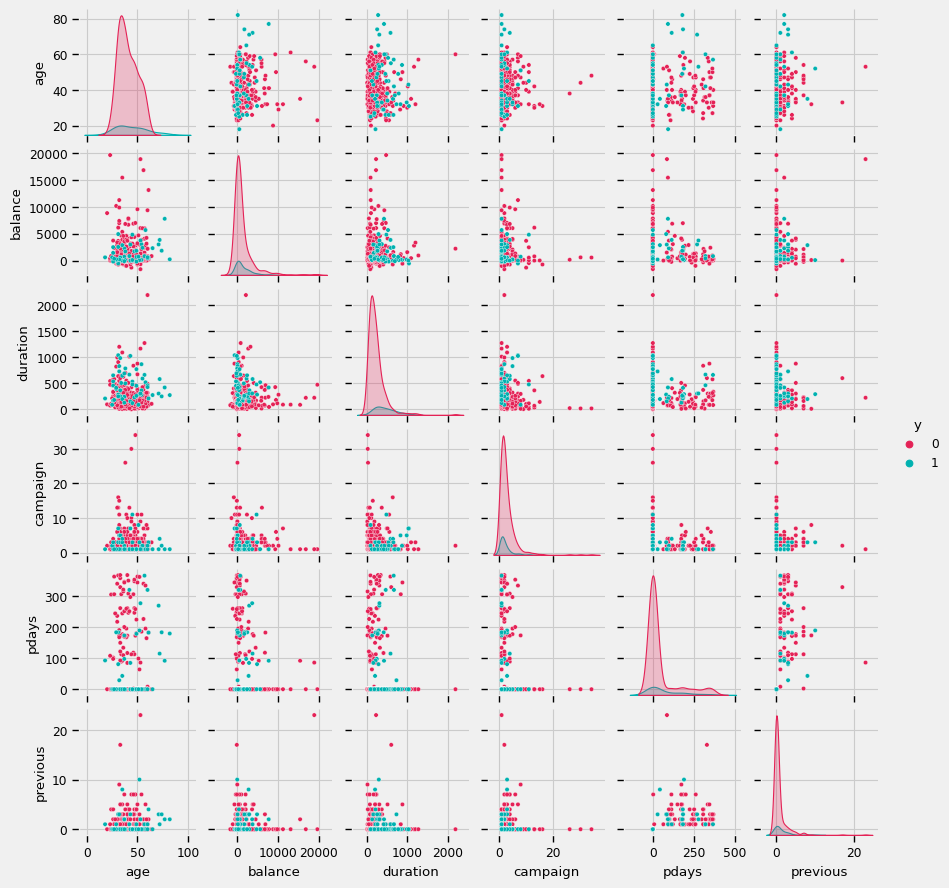

,age,balance,duration,campaign,pdays,previous,y
age,nan,nan,nan,nan,nan,nan,nan
balance,0.10,nan,nan,nan,nan,nan,nan
duration,-0.00,0.02,nan,nan,nan,nan,nan
campaign,0.00,-0.01,-0.08,nan,nan,nan,nan
pdays,-0.02,0.00,-0.00,-0.09,nan,nan,nan
previous,0.00,0.02,0.00,-0.03,0.45,nan,nan
y,0.03,0.05,0.39,-0.07,0.10,0.09,nan


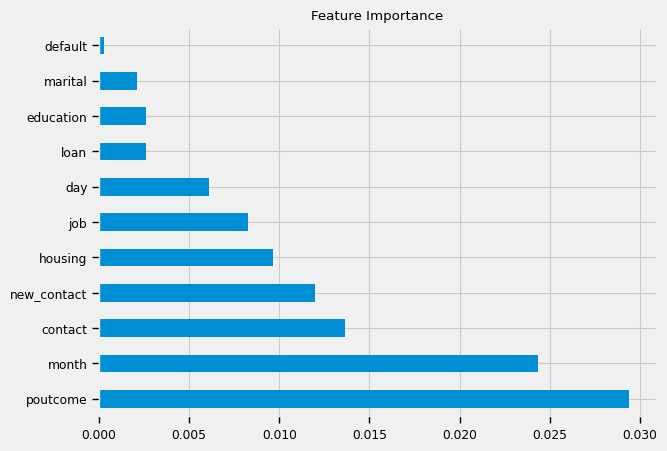

In [137]:
# 1. visualize features
df['y'] = y
eda_helper = helpers.EDAHelper(df, TARGET_NAME)
eda_helper.init_diagnostic()

In [ ]:
# 2. treat outliers
strategy = {
    'iso': True,
    'cols': [
        ['age', 'cap', {'kind': 'percentile', 'threshold':(10, 90)}],
        ['balance', 'filter', {'kind': 'iqr'}]
    ]
}

outlier_helper = helpers.OutlierHelper(df, strategy)

df_filtered = outlier_helper.treat_outliers()

## Pre-processing

1. One-hot encode features
2. Scale numerical features
3. Feature selection/ importance /Drop useless/ highly correlated features
4. Impute any missing data
5. Train/ test split

In [28]:
import pickle

#Sklearn
from sklearn.model_selection import (train_test_split, RandomizedSearchCV, 
                                     RepeatedStratifiedKFold, cross_validate)

# Assemble pipeline(s)
from sklearn import set_config
from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures

# Handle constant/duplicates and missing features/columns
from feature_engine.selection import (DropFeatures, DropConstantFeatures, 
                                      DropDuplicateFeatures)

# Sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import roc_auc_score, mutual_info_score, r2_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from scipy.stats import loguniform

set_config(display="diagram")  # make pipeline visible

In [30]:
# Linear model (logistic regression)
lr = LogisticRegression(warm_start=True, max_iter=400)
# RandomForest
rf = RandomForestClassifier()
# XGB
xgb = XGBClassifier(tree_method="hist", verbosity=0, silent=True)
# Ensemble
lr_xgb_rf = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb), ('rf', rf)], 
                             voting='soft')

# Pipeline
ppl = imbPipeline([
    # Step 1: Drop irrelevant columns/features
    ('drop_columns', DropFeatures(drop_cols)),
    ('drop_constant_values', DropConstantFeatures(tol=1, missing_values='ignore')),
    ('drop_duplicates', DropDuplicateFeatures()),
    
    # Step 2: Impute and scale columns/features
    ('cleaning', ColumnTransformer([
        # Step 2.1: Apply steps for numerical features
        ('num',make_pipeline(
            #SimpleImputer(strategy='mean'),
            MinMaxScaler()),
         num_columns
        ),
        # Step 2.2 Apply steps for categorial features
        ('cat',make_pipeline(
            #SimpleImputer(strategy='most_frequent'),
            OneHotEncoder(sparse=False, handle_unknown='ignore')),
         one_hot_encoding_columns
        )])
    ),
    
    # Step 3: Sampling
    ('smote', SMOTE()),
    
    # Step 4: Voting Classifier
    ('ensemble', lr_xgb_rf)
])

# Hyperparameter Tuning
params = {
    'ensemble__lr__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'ensemble__lr__penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'ensemble__lr__C': loguniform(1e-5, 100),
    'ensemble__xgb__learning_rate': [0.1],
    'ensemble__xgb__max_depth': [7, 10, 15, 20],
    'ensemble__xgb__min_child_weight': [10, 15, 20, 25],
    'ensemble__xgb__colsample_bytree': [0.8, 0.9, 1],
    'ensemble__xgb__n_estimators': [300, 400, 500, 600],
    'ensemble__xgb__reg_alpha': [0.5, 0.2, 1],
    'ensemble__xgb__reg_lambda': [2, 3, 5],
    'ensemble__xgb__gamma': [1, 2, 3],
    'ensemble__rf__max_depth': [7, 10, 15, 20],
    'ensemble__rf__min_samples_leaf': [1, 2, 4],
    'ensemble__rf__min_samples_split': [2, 5, 10],
    'ensemble__rf__n_estimators': [300, 400, 500, 600],
}

# Scores to track
scorer = {
    'lift_score': make_scorer(lift_score),
    'roc_auc':'roc_auc',
    'f1':'f1',
    'f1_macro':'f1_macro',
    'f2': make_scorer(fbeta_score, beta=2),
    'recall':'recall',
    'precision':'precision',
    'average_precision':'average_precision'
}

rsf = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
clf = RandomizedSearchCV(ppl, params,scoring=scorer, verbose=2, cv=rsf)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)
print("AUC:", roc_auc_score(y_test, pred))

Fitting 50 folds for each of 10 candidates, totalling 500 fits
[CV] END ensemble__lr__C=1.7143233498641988, ensemble__lr__penalty=none, ensemble__lr__solver=lbfgs, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.8, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=500, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=2; total time=  38.9s
[CV] END ensemble__lr__C=1.7143233498641988, ensemble__lr__penalty=none, ensemble__lr__solver=lbfgs, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.8, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=500, ensemble__x

[CV] END ensemble__lr__C=1.7143233498641988, ensemble__lr__penalty=none, ensemble__lr__solver=lbfgs, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.8, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=500, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=2; total time=  32.4s
[CV] END ensemble__lr__C=1.7143233498641988, ensemble__lr__penalty=none, ensemble__lr__solver=lbfgs, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.8, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=500, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=2; total time=  31

[CV] END ensemble__lr__C=1.7143233498641988, ensemble__lr__penalty=none, ensemble__lr__solver=lbfgs, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.8, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=500, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=2; total time=  33.8s
[CV] END ensemble__lr__C=1.7143233498641988, ensemble__lr__penalty=none, ensemble__lr__solver=lbfgs, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.8, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=500, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=2; total time=  32

[CV] END ensemble__lr__C=0.0006954611071216587, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=7, ensemble__xgb__min_child_weight=25, ensemble__xgb__n_estimators=500, ensemble__xgb__reg_alpha=1, ensemble__xgb__reg_lambda=5; total time=  28.9s
[CV] END ensemble__lr__C=0.0006954611071216587, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=7, ensemble__xgb__min_child_weight=25, ensemble__xgb__n_estimators=500, ensemble__xgb__reg_alpha=1, ensemble__xgb__reg_lambda=5; total time=  

[CV] END ensemble__lr__C=0.0006954611071216587, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=7, ensemble__xgb__min_child_weight=25, ensemble__xgb__n_estimators=500, ensemble__xgb__reg_alpha=1, ensemble__xgb__reg_lambda=5; total time=  29.9s
[CV] END ensemble__lr__C=0.0006954611071216587, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=7, ensemble__xgb__min_child_weight=25, ensemble__xgb__n_estimators=500, ensemble__xgb__reg_alpha=1, ensemble__xgb__reg_lambda=5; total time=  

[CV] END ensemble__lr__C=0.0006954611071216587, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=7, ensemble__xgb__min_child_weight=25, ensemble__xgb__n_estimators=500, ensemble__xgb__reg_alpha=1, ensemble__xgb__reg_lambda=5; total time=  28.5s
[CV] END ensemble__lr__C=0.0006954611071216587, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=7, ensemble__xgb__min_child_weight=25, ensemble__xgb__n_estimators=500, ensemble__xgb__reg_alpha=1, ensemble__xgb__reg_lambda=5; total time=  

[CV] END ensemble__lr__C=63.48895211436279, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=20, ensemble__rf__min_samples_leaf=4, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=600, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=2; total time=  55.6s
[CV] END ensemble__lr__C=63.48895211436279, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=20, ensemble__rf__min_samples_leaf=4, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=600, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=2; total time=  56.6s


[CV] END ensemble__lr__C=63.48895211436279, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=20, ensemble__rf__min_samples_leaf=4, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=600, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=2; total time=  50.9s
[CV] END ensemble__lr__C=63.48895211436279, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=20, ensemble__rf__min_samples_leaf=4, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=600, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=2; total time=  51.0s


[CV] END ensemble__lr__C=63.48895211436279, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=20, ensemble__rf__min_samples_leaf=4, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=600, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=2; total time=  50.9s
[CV] END ensemble__lr__C=63.48895211436279, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=20, ensemble__rf__min_samples_leaf=4, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=600, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=2; total time=  46.7s


[CV] END ensemble__lr__C=0.01765111031759014, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=400, ensemble__xgb__colsample_bytree=0.8, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=300, ensemble__xgb__reg_alpha=0.5, ensemble__xgb__reg_lambda=2; total time=  31.1s
[CV] END ensemble__lr__C=0.01765111031759014, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=400, ensemble__xgb__colsample_bytree=0.8, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=300, ensemble__xgb__reg_alpha=0.5, ensemble__xgb__reg_lambda=2; total time=

[CV] END ensemble__lr__C=0.01765111031759014, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=400, ensemble__xgb__colsample_bytree=0.8, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=300, ensemble__xgb__reg_alpha=0.5, ensemble__xgb__reg_lambda=2; total time=  29.6s
[CV] END ensemble__lr__C=0.01765111031759014, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=400, ensemble__xgb__colsample_bytree=0.8, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=300, ensemble__xgb__reg_alpha=0.5, ensemble__xgb__reg_lambda=2; total time=

[CV] END ensemble__lr__C=0.01765111031759014, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=400, ensemble__xgb__colsample_bytree=0.8, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=300, ensemble__xgb__reg_alpha=0.5, ensemble__xgb__reg_lambda=2; total time=  30.1s
[CV] END ensemble__lr__C=0.01765111031759014, ensemble__lr__penalty=l2, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=15, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=400, ensemble__xgb__colsample_bytree=0.8, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=300, ensemble__xgb__reg_alpha=0.5, ensemble__xgb__reg_lambda=2; total time=

[CV] END ensemble__lr__C=0.00010423940170808318, ensemble__lr__penalty=l2, ensemble__lr__solver=newton-cg, ensemble__rf__max_depth=10, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=400, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=1, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=300, ensemble__xgb__reg_alpha=1, ensemble__xgb__reg_lambda=5; total time=  25.6s
[CV] END ensemble__lr__C=0.00010423940170808318, ensemble__lr__penalty=l2, ensemble__lr__solver=newton-cg, ensemble__rf__max_depth=10, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=400, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=1, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=300, ensemble__xgb__reg_alpha=1, ensemble__xgb__reg_lambda=5; total t

[CV] END ensemble__lr__C=0.00010423940170808318, ensemble__lr__penalty=l2, ensemble__lr__solver=newton-cg, ensemble__rf__max_depth=10, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=400, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=1, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=300, ensemble__xgb__reg_alpha=1, ensemble__xgb__reg_lambda=5; total time=  26.0s
[CV] END ensemble__lr__C=0.00010423940170808318, ensemble__lr__penalty=l2, ensemble__lr__solver=newton-cg, ensemble__rf__max_depth=10, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=400, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=1, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=300, ensemble__xgb__reg_alpha=1, ensemble__xgb__reg_lambda=5; total t

[CV] END ensemble__lr__C=0.00010423940170808318, ensemble__lr__penalty=l2, ensemble__lr__solver=newton-cg, ensemble__rf__max_depth=10, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=400, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=1, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=300, ensemble__xgb__reg_alpha=1, ensemble__xgb__reg_lambda=5; total time=  25.0s
[CV] END ensemble__lr__C=0.00010423940170808318, ensemble__lr__penalty=l2, ensemble__lr__solver=newton-cg, ensemble__rf__max_depth=10, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=400, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=1, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=300, ensemble__xgb__reg_alpha=1, ensemble__xgb__reg_lambda=5; total t

[CV] END ensemble__lr__C=0.0007195185303976038, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=600, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; total time=   0.5s
[CV] END ensemble__lr__C=0.0007195185303976038, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=600, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_l

[CV] END ensemble__lr__C=0.0007195185303976038, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=600, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; total time=   0.5s
[CV] END ensemble__lr__C=0.0007195185303976038, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=600, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_l

[CV] END ensemble__lr__C=0.0007195185303976038, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=600, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; total time=   0.5s
[CV] END ensemble__lr__C=0.0007195185303976038, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=20, ensemble__xgb__n_estimators=600, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_l

[CV] END ensemble__lr__C=0.6130145593063453, ensemble__lr__penalty=l2, ensemble__lr__solver=lbfgs, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=4, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=500, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=1, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; total time=  28.8s
[CV] END ensemble__lr__C=0.6130145593063453, ensemble__lr__penalty=l2, ensemble__lr__solver=lbfgs, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=4, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=500, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=1, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; total time=  29.9s
[CV]

[CV] END ensemble__lr__C=0.6130145593063453, ensemble__lr__penalty=l2, ensemble__lr__solver=lbfgs, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=4, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=500, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=1, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; total time=  29.1s
[CV] END ensemble__lr__C=0.6130145593063453, ensemble__lr__penalty=l2, ensemble__lr__solver=lbfgs, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=4, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=500, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=1, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; total time=  29.8s
[CV]

[CV] END ensemble__lr__C=0.6130145593063453, ensemble__lr__penalty=l2, ensemble__lr__solver=lbfgs, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=4, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=500, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=1, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; total time=  28.7s
[CV] END ensemble__lr__C=0.6130145593063453, ensemble__lr__penalty=l2, ensemble__lr__solver=lbfgs, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=4, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=500, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=1, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=10, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; total time=  28.4s
[CV]

[CV] END ensemble__lr__C=16.81631505958779, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=newton-cg, ensemble__rf__max_depth=20, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=600, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=15, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; total time=   0.6s
[CV] END ensemble__lr__C=16.81631505958779, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=newton-cg, ensemble__rf__max_depth=20, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=600, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=15, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; tot

[CV] END ensemble__lr__C=16.81631505958779, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=newton-cg, ensemble__rf__max_depth=20, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=600, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=15, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; total time=   0.5s
[CV] END ensemble__lr__C=16.81631505958779, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=newton-cg, ensemble__rf__max_depth=20, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=600, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=15, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; tot

[CV] END ensemble__lr__C=16.81631505958779, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=newton-cg, ensemble__rf__max_depth=20, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=600, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=15, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; total time=   0.6s
[CV] END ensemble__lr__C=16.81631505958779, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=newton-cg, ensemble__rf__max_depth=20, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=600, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=3, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=15, ensemble__xgb__min_child_weight=15, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=5; tot

[CV] END ensemble__lr__C=0.6082056200342139, ensemble__lr__penalty=none, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=500, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=25, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.5, ensemble__xgb__reg_lambda=5; total time=   0.5s
[CV] END ensemble__lr__C=0.6082056200342139, ensemble__lr__penalty=none, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=500, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=25, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.5, ensemble__xgb__reg_lambda=5; total time=   0

[CV] END ensemble__lr__C=0.6082056200342139, ensemble__lr__penalty=none, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=500, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=25, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.5, ensemble__xgb__reg_lambda=5; total time=   0.5s
[CV] END ensemble__lr__C=0.6082056200342139, ensemble__lr__penalty=none, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=500, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=25, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.5, ensemble__xgb__reg_lambda=5; total time=   0

[CV] END ensemble__lr__C=0.6082056200342139, ensemble__lr__penalty=none, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=500, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=25, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.5, ensemble__xgb__reg_lambda=5; total time=   0.5s
[CV] END ensemble__lr__C=0.6082056200342139, ensemble__lr__penalty=none, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=500, ensemble__xgb__colsample_bytree=1, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=25, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.5, ensemble__xgb__reg_lambda=5; total time=   0

[CV] END ensemble__lr__C=0.006855899068812795, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=3; total time=   0.5s
[CV] END ensemble__lr__C=0.006855899068812795, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lam

[CV] END ensemble__lr__C=0.006855899068812795, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=3; total time=   0.5s
[CV] END ensemble__lr__C=0.006855899068812795, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lam

[CV] END ensemble__lr__C=0.006855899068812795, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lambda=3; total time=   0.5s
[CV] END ensemble__lr__C=0.006855899068812795, ensemble__lr__penalty=elasticnet, ensemble__lr__solver=liblinear, ensemble__rf__max_depth=7, ensemble__rf__min_samples_leaf=1, ensemble__rf__min_samples_split=10, ensemble__rf__n_estimators=300, ensemble__xgb__colsample_bytree=0.9, ensemble__xgb__gamma=2, ensemble__xgb__learning_rate=0.1, ensemble__xgb__max_depth=20, ensemble__xgb__min_child_weight=10, ensemble__xgb__n_estimators=400, ensemble__xgb__reg_alpha=0.2, ensemble__xgb__reg_lam

array([[7408,  578],
       [ 569,  488]])

In [36]:
file_to_write = open(f"bank.pickle", "wb")
pickle.dump(clf, file_to_write)

In [33]:
clf.best_params_

{'ensemble__lr__C': 63.48895211436279,
 'ensemble__lr__penalty': 'l2',
 'ensemble__lr__solver': 'liblinear',
 'ensemble__rf__max_depth': 20,
 'ensemble__rf__min_samples_leaf': 4,
 'ensemble__rf__min_samples_split': 5,
 'ensemble__rf__n_estimators': 600,
 'ensemble__xgb__colsample_bytree': 1,
 'ensemble__xgb__gamma': 3,
 'ensemble__xgb__learning_rate': 0.1,
 'ensemble__xgb__max_depth': 20,
 'ensemble__xgb__min_child_weight': 20,
 'ensemble__xgb__n_estimators': 400,
 'ensemble__xgb__reg_alpha': 0.2,
 'ensemble__xgb__reg_lambda': 2}

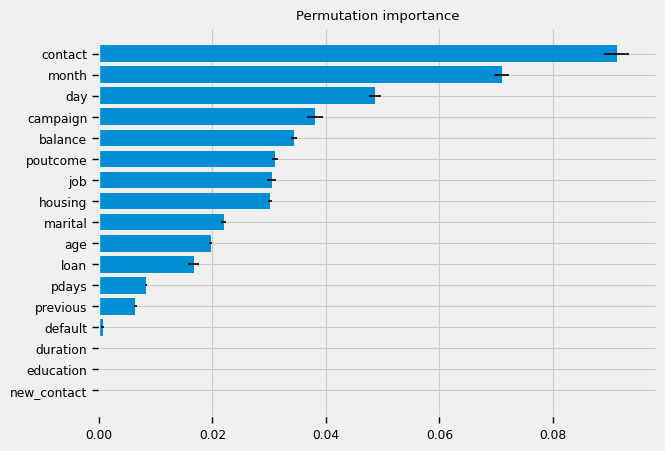

In [156]:
# 4. Automatically look at feature importance
def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """
    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])
    ax.set_yticks(range(len(indices)))
    ax.set_title("Permutation importance")
    
    tmp = np.array(feat_name)
    _ = ax.set_yticklabels(tmp[indices])

# We provide the function our hyperparameter-tuned model/pipeline: clf
# In case we do not use hyperparameter tuning, we could provide here a fitted version of ppl
# For example: ppl.fit(X_train, y_train)
perm_importance_result_train = permutation_importance(clf, X_train, y_train, random_state=42)
plot_feature_importances(perm_importance_result_train, X_train.columns)

In [157]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'new_contact'],
      dtype='object')

Train               precision    recall  f1-score   support

           0       0.94      0.94      0.94     31936
           1       0.53      0.53      0.53      4232

    accuracy                           0.89     36168
   macro avg       0.74      0.73      0.73     36168
weighted avg       0.89      0.89      0.89     36168

Test               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7986
           1       0.46      0.46      0.46      1057

    accuracy                           0.87      9043
   macro avg       0.69      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043



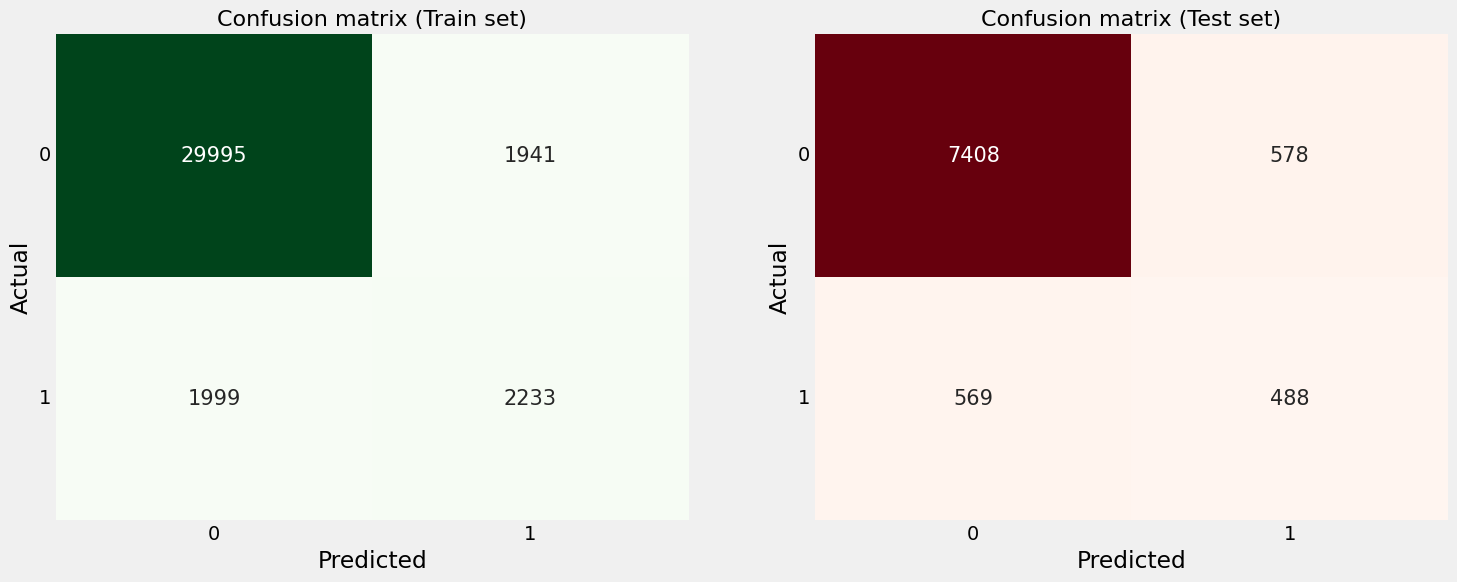

In [104]:
# 5. Model eval
    
model_eval = helpers.ModelEvaluator(clf, X_train, X_test, y_train, y_test)
model_eval.plot_confusion_matrix()

In [ ]:
# 6. Configure final model/ save down / log
#ppl.set_params(**dict_with_best_params)